<a href="https://colab.research.google.com/github/Sahsh/BigData/blob/main/NewsAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                                               source  \
0              {'id': None, 'name': 'New York Times'}   
1              {'id': None, 'name': 'New York Times'}   
2              {'id': None, 'name': 'New York Times'}   
3              {'id': None, 'name': 'New York Times'}   
4              {'id': None, 'name': 'New York Times'}   
5              {'id': None, 'name': 'New York Times'}   
6              {'id': None, 'name': 'New York Times'}   
7              {'id': None, 'name': 'New York Times'}   
8              {'id': None, 'name': 'New York Times'}   
9              {'id': None, 'name': 'New York Times'}   
10             {'id': None, 'name': 'New York Times'}   
11             {'id': None, 'name': 'New York Times'}   
12             {'id': None, 'name': 'New York Times'}   
13             {'id': None, 'name': 'New York Times'}   
14             {'id': None, 'name': 'New York Times'}   
15             {'id': None, 'name': 'New York Times'}   
21               {'id': None, '

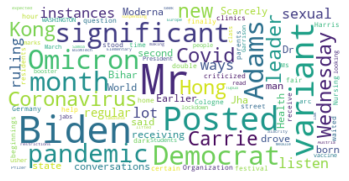

In [55]:
#!pip install spacy
#!pip install newsapi-python
#!python -m spacy download en
#!python -m spacy download en_core_web_lg
import spacy
from newsapi.newsapi_client import NewsApiClient
import pickle
import string
import pandas as pd
from collections import Counter 
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
import tempfile
from google.colab import files
import nltk
from nltk.tokenize import RegexpTokenizer
  
nlp_eng = spacy.load('en_core_web_lg')
newsapi = NewsApiClient (api_key='c449969c3f124770ac867eedea38bdd2')

dados =[]
for i in range(1,6):
  articles_page = newsapi.get_everything(q='coronavirus', language='en', from_param='2022-02-27', to='2022-03-27', sort_by='relevancy', page = i)
  dados.extend(articles_page['articles'])


filename = 'articlesCOVID.pckl'
articles = {}
pickle.dump(articles, open(filename, 'wb'))
filename = 'articlesCOVID.pckl'
loaded_model = pickle.load(open(filename, 'rb'))
filepath = '/content/articlesCOVID.pckl'
pickle.dump(loaded_model, open(filepath, 'wb'))

tokenizer = RegexpTokenizer(r'\w+')

for i, article in enumerate(articles):
    for x in article['articles']:
        title = x['title']
        description = x['description']
        content = x['content']
    df = dados.append(articles_page['title':title[i], 'date':date[i], 'desc':description[i], 'content':content])
df = pd.DataFrame(dados)
df = df.dropna()
df.head()
print(df)

print()


for article in articles_page['articles']: 
      print('Title : ',article['title'])
      print('Description : ',article['description'])
      print('Content: ', article['content'],'\n\n')
    
def get_keywords_eng(token):
  result = []
  for text in token:
    if (text in nlp_eng.Defaults.stop_words or text in string.punctuation):
      continue
    else:
      result.append(text)
  return result

results = []
for content in df.content.values:
    content = tokenizer.tokenize(content)
    results.append([('#' + x[0]) for x in Counter(get_keywords_eng(content)).most_common(5)])
df['keywords'] = results
print()
print("KEYWORDS:")
print(results)

text = ' '
for x in results: 
  for y in x:
    text = text + " " + y
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()